In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
from scipy.ndimage import zoom
from scipy.optimize import minimize_scalar
from cued_sf2_lab.familiarisation import load_mat_img, plot_image

In [2]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lena, _ = load_mat_img(img='lena.mat', img_info='image')
peppers, _ = load_mat_img(img='peppers.mat', img_info='image')
columbia, _ = load_mat_img(img='columbia.mat', img_info='image')
camera, _ = load_mat_img(img='camera.mat', img_info='image')
lake, _ = load_mat_img(img='lake.mat', img_info='image')
baboon, _ = load_mat_img(img='baboon.mat', img_info='image')
couple, _ = load_mat_img(img='couple.mat', img_info='image')
plane, _ = load_mat_img(img='plane.mat', img_info='image')
peppers = zoom(peppers, 256/512)
columbia = zoom(columbia, 256/480)
lena = zoom(lena, 256/512)
baboon = zoom(baboon, 256/512)
plane = zoom(plane, 256/512)
lake = zoom(lake, 256/512)
couple = zoom(couple, 256/512)
chair, _ = load_mat_img(img='img1.mat', img_info='X')
city, _ = load_mat_img(img='img2.mat', img_info='X')
competition, _ = load_mat_img(img='comp.mat', img_info='X')

In [3]:
lighthouse = lighthouse - 128.0
flamingo = flamingo - 128.0
bridge = bridge - 128.0
lena = lena - 128.0
peppers = peppers - 128.0
columbia = columbia - 128.0
camera = camera - 128.0
baboon = baboon - 128.0
plane = plane - 128.0
lake = lake - 128.0
couple = couple - 128.0
chair = chair - 128.0
city = city - 128.0
competition = competition - 128.0

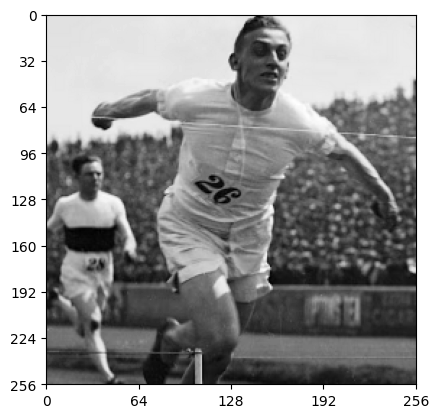

In [4]:
fig,ax=plt.subplots()
plot_image(competition, ax=ax);

In [5]:
image = competition
target_bits = 40960

In [6]:
from skimage.metrics import structural_similarity as ssim_comp
import sewar

# Structural Similarity Index (SSIM)
def ssim_index(imageA, imageB):
    return ssim_comp(imageA, imageB, multichannel=True)

# Visual Information Fidelity
def vif_index(imageA, imageB):
    return sewar.full_ref.vifp(imageA, imageB)

In [7]:
from cued_sf2_lab.jpeg_lbt_2 import jpegdec_lbt2, jpegenc_lbt2, objective_function_lbt2

In [16]:
N = 4
M = 16
fdq = True
log = False

step = (minimize_scalar(objective_function_lbt2, bounds=(0, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt2(image, step, fdq, N, M, opthuff=True, log=log)
# print(totalbits)
Z = jpegdec_lbt2(vlc, step, fdq, N, M, hufftab=hufftab, log=log)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [9]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

5.804630320557806 0.9287301210793146 0.5711499785497365


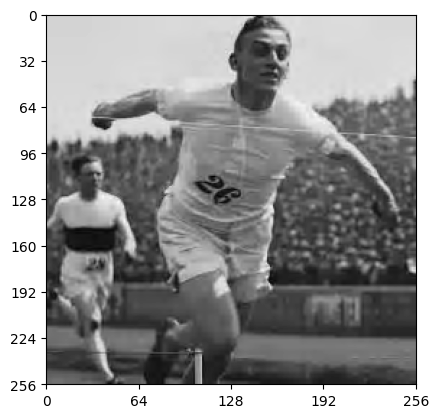

In [10]:
N = 4
M = 16
fdq = False
log = False

step = (minimize_scalar(objective_function_lbt2, bounds=(1, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt2(image, step, fdq, N, M, opthuff=True, log=log)
# print(totalbits)
Z = jpegdec_lbt2(vlc, step, fdq, N, M, hufftab=hufftab, log=log)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [11]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

5.824863808405054 0.9297044208724913 0.5734052044096664


In [12]:
from cued_sf2_lab.jpeg_dwt_param import jpegdec_dwt, jpegenc_dwt, objective_function_dwt

Performing 3-level DWT
Quantising to step size of 4.272565643667245
Regrouping into 8 x 8 blocks
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39532
Bits for huffman table = 1424
40956
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 4.272565643667245
Performing inverse DWT


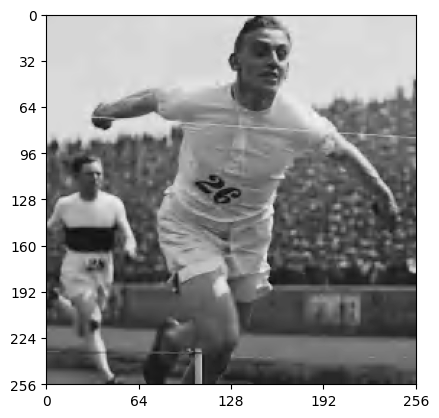

In [13]:
n = 3
M = 8 #2**n
rise = 1
step = (minimize_scalar(objective_function_dwt, bounds=(1, 20), args=(image, rise, target_bits, n, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_dwt(image, step, rise, n, M, opthuff=True)
print(totalbits)
Z = jpegdec_dwt(vlc, step, rise, n, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [14]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

6.256159971151138 0.9188170227351874 0.5510187260782707
